In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [157]:
data = pd.read_csv("../data/score.csv")
X = data["Hours"]
Y = data["Scores"]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [158]:
X_train = X_train.values.flatten()
Y_train = Y_train.values.flatten()
Y_test = Y_test.values.flatten()
X_test = X_test.values.flatten()
X_train,Y_train

(array([2.7, 3.3, 5.1, 3.8, 1.5, 3.2, 4.5, 8.9, 8.5, 3.5, 2.7, 1.9, 4.8,
        6.1, 7.8, 5.5, 7.7, 1.1, 7.4, 9.2]),
 array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
        17, 69, 88], dtype=int64))

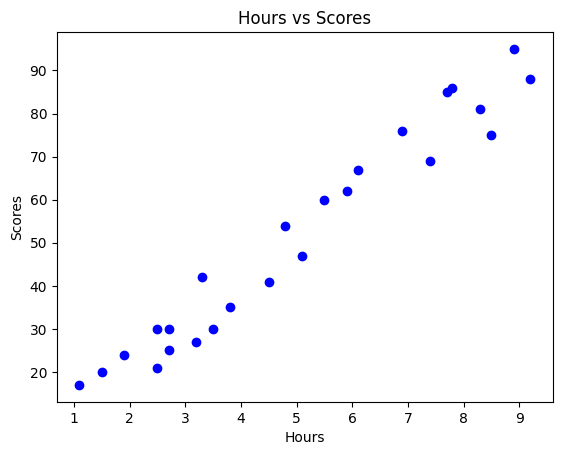

In [159]:
plt.scatter(X, Y, color="blue")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [160]:
def linear_regression(X, Y):
    y_mean = np.mean(Y)
    x_mean = np.mean(X)
    numerator = np.sum((X - x_mean) * (Y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    return slope, intercept

In [161]:
def predict(X, slope, intercept):
    return slope * X + intercept

In [162]:
def MSE(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

def r_squared(Y_true, Y_pred):
    ss_total = np.sum((Y_true - np.mean(Y_true)) ** 2)
    ss_residual = np.sum((Y_true - Y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def MAE(Y_true, Y_pred):
    return np.mean(np.abs(Y_true - Y_pred))

In [163]:
m,c = linear_regression(X_train, Y_train)

Slope: 9.682078154455699, Intercept: 2.82689235389973
MSE: 18.943211722315283, R^2: 0.9678055545167993, MAE: 3.920751190209927


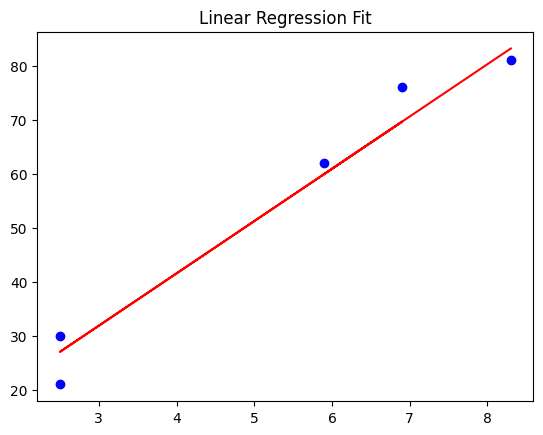

In [164]:
y_pred = predict(X_test, m, c)
mse = MSE(Y_test, y_pred)
r2 = r_squared(Y_test, y_pred) 
mae = MAE(Y_test, y_pred)
print(f"Slope: {m}, Intercept: {c}")
print(f"MSE: {mse}, R^2: {r2}, MAE: {mae}")
plt.scatter(X_test, Y_test, color="blue", label="Training Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.title("Linear Regression Fit");